In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [12]:
#Import Combined Cleaned Kaggle Data
df = pd.read_csv('Cleaned_Combined_Kaggle_Data.csv')
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [13]:
# Using on US data 
US_df = df[df['Country'] == 'United States of America']
US_df

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
5,23.0,Female,United States of America,Bachelor’s degree,Data Scientist,5.0,84999.5
8,32.0,Male,United States of America,Master’s degree,Product/Project Manager,5.0,94999.5
9,52.0,Female,United States of America,Master’s degree,Data Analyst,20.0,137499.5
12,37.0,Male,United States of America,Bachelor’s degree,Other,10.0,137499.5
19,32.0,Female,United States of America,Master’s degree,Research Scientist,10.0,174999.5
...,...,...,...,...,...,...,...
26115,32.0,Male,United States of America,Some college/university study without earning ...,Other,5.0,137499.5
26127,37.0,Female,United States of America,Master’s degree,Data Analyst,2.0,84999.5
26131,57.0,Male,United States of America,Doctoral degree,Data Scientist,5.0,400000.0
26135,52.0,Female,United States of America,Master’s degree,Software Engineer,20.0,174999.5


In [14]:
# Women data of US
Women_df = US_df[US_df['Gender'] == 'Female']

In [15]:
# Men data of US
Men_df = US_df[US_df['Gender'] == 'Male']

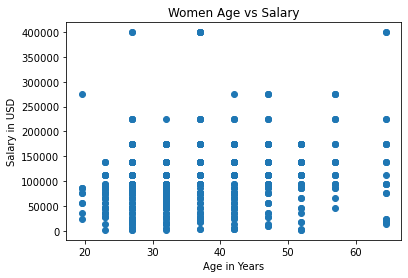

In [16]:
plt.scatter(Women_df.Age, Women_df.Salary)
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Women Age vs Salary')
plt.show()

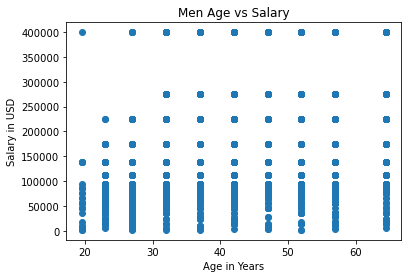

In [17]:
plt.scatter(Men_df.Age, Men_df.Salary)
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Men Age vs Salary')
plt.show()

In [18]:
Women_X = Women_df['Age']
Men_X = Men_df['Age']

In [19]:
Women_X = Women_df.Age.values.reshape(-1, 1)
Men_X = Men_df.Age.values.reshape(-1, 1)

In [20]:
Women_y = Women_df.Salary
Men_y = Men_df.Salary

In [21]:
Women_X = Women_df.Age.values.reshape(-1, 1)
Men_X = Men_df.Age.values.reshape(-1, 1)

In [22]:
Women_y = Women_df.Salary
Men_y = Men_df.Salary

In [23]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Men_model = LinearRegression()

In [24]:
from sklearn.linear_model import LinearRegression
Women_model.fit(Women_X, Women_y)

LinearRegression()

In [25]:
Men_model.fit(Men_X, Men_y)

LinearRegression()

In [26]:
Women_y_pred = Women_model.predict(Women_X)
print(Women_y_pred.shape)

(885,)


In [27]:
Men_y_pred = Men_model.predict(Men_X)
print(Men_y_pred.shape)

(3903,)


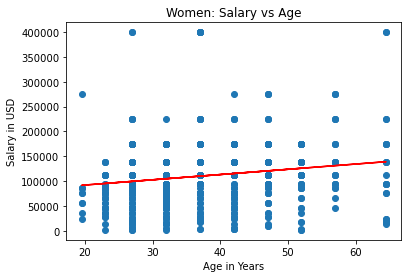

In [28]:
plt.scatter(Women_X, Women_y)
plt.plot(Women_X, Women_y_pred, color='red')
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Age')
plt.show()

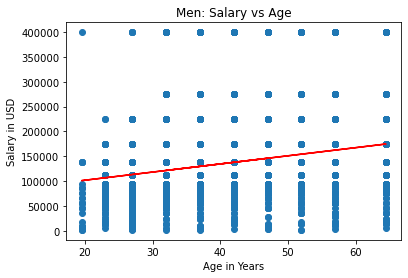

In [35]:
plt.scatter(Men_X, Men_y)
plt.plot(Men_X, Men_y_pred, color='red')
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Age')
plt.show()

In [30]:
print(Women_model.coef_)
print(Women_model.intercept_)

[1056.24293621]
70888.22871340805


In [31]:
print(Men_model.coef_)
print(Men_model.intercept_)

[1639.68849527]
68944.7988896175


In [32]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Women_X1 = sm.add_constant(Women_X)
result = sm.OLS(Women_y, Women_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.03064321419116678 0.029545414886740118


In [33]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Men_X1 = sm.add_constant(Men_X)
result = sm.OLS(Men_y, Men_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.06905352422189848 0.06881488118786161


In [34]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Men_X1 = sm.add_constant(Men_X)
result = sm.OLS(Men_y, Men_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.06905352422189848 0.06881488118786161
